In [1]:
import numpy as np
import pandas as pd
import os
import json
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from plotting_utils import *

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
RESULTS_FILES = []
'''
RESULTS_FILES += [
    f"hyperparam_search_test.{classifier_name}.{vlm_name}.csv"
    for classifier_name, vlm_name in itertools.product(
        ["CoopFewShotClassifier", "CoNaFewShotClassifier", ],
        ["ClipVLM", "MILES_SimilarityVLM"] #, "VideoClipVLM"]
    )
]
RESULTS_FILES += [
    "test.vl_proto.csv"
]
'''
RESULTS_FILES += [
    f"experiment.{classifier_name}.{vlm_name}.csv"
    for classifier_name, vlm_name in itertools.product(
        ["CoopFewShotClassifier", "CoNaFewShotClassifier", "CoNaAdapterFewShotClassifier"],
        ["ClipVLM", "MILES_SimilarityVLM", "VideoClipVLM"]
    )
]

results_dataframes = [pd.read_csv(file) for file in RESULTS_FILES]
results = combine_results(*results_dataframes)

33 Overall Lines
12 Separate Plots


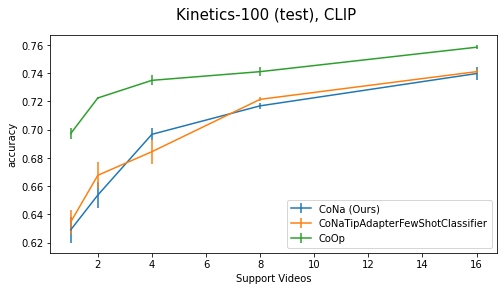

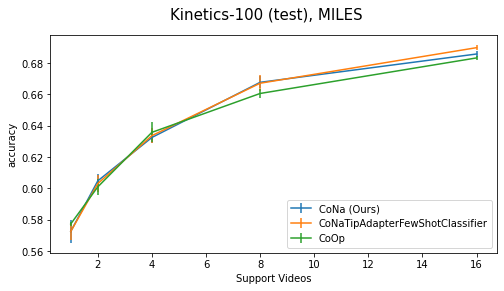

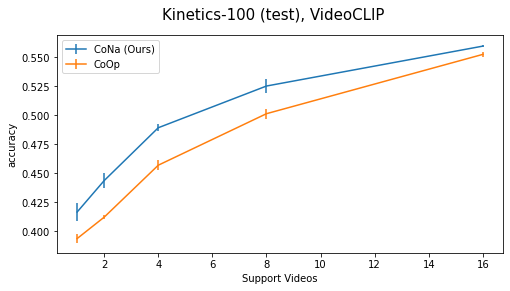

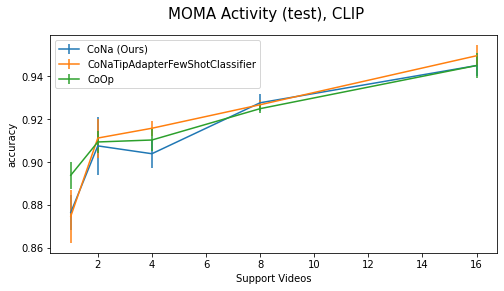

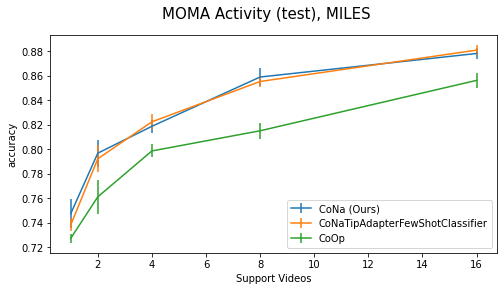

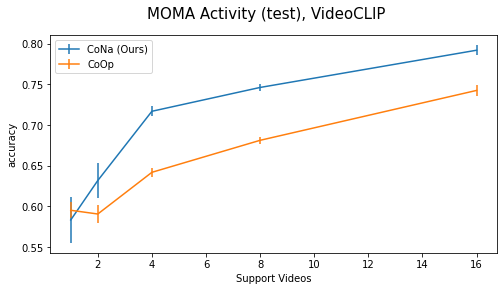

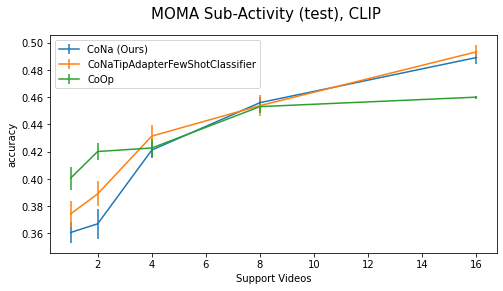

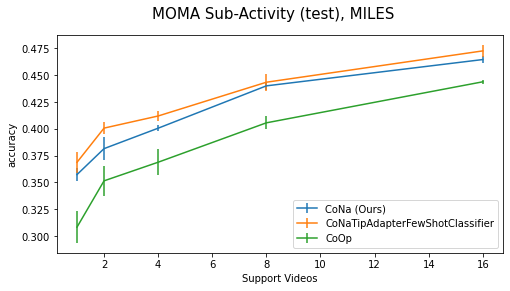

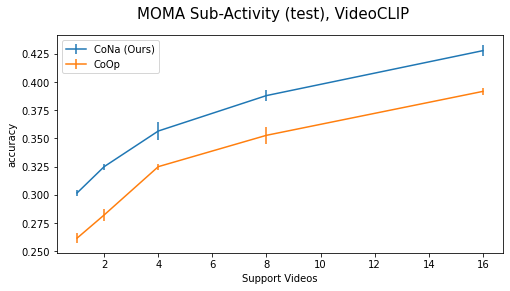

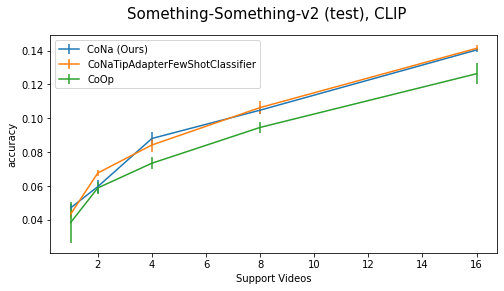

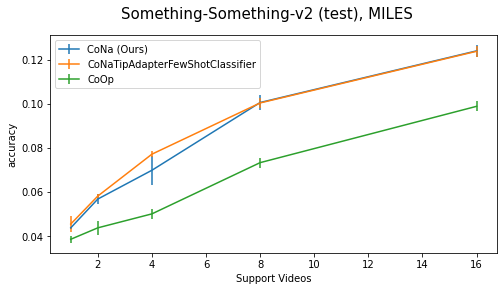

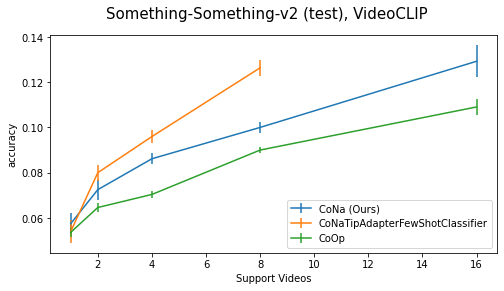

In [8]:
plot(
    results,
    x_col="n_support",
    y_col="accuracy",
    plot_descriptor_cols=["query_dataset", "vlm_class"],
    line_descriptor_cols=["classifier_class"],
    filter_dict={
        "n_support": [1,2,4,8,16],
    },
    show_error_bars=True,
    savedir="result_plots"
)

In [9]:
display(results["classifier_class"])

0                CoopFewShotClassifier
1                CoopFewShotClassifier
2                CoopFewShotClassifier
3                CoopFewShotClassifier
4                CoopFewShotClassifier
                    ...               
159    CoNaTipAdapterFewShotClassifier
160    CoNaTipAdapterFewShotClassifier
161    CoNaTipAdapterFewShotClassifier
162    CoNaTipAdapterFewShotClassifier
163    CoNaTipAdapterFewShotClassifier
Name: classifier_class, Length: 164, dtype: object

12 Overall Lines
4 Separate Plots


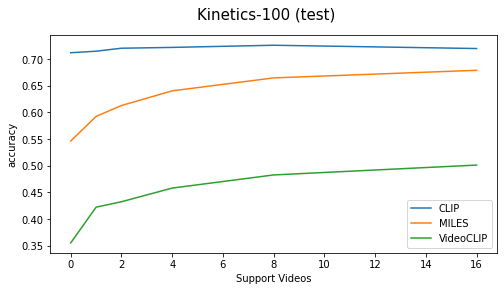

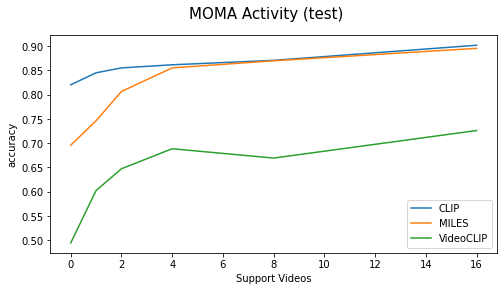

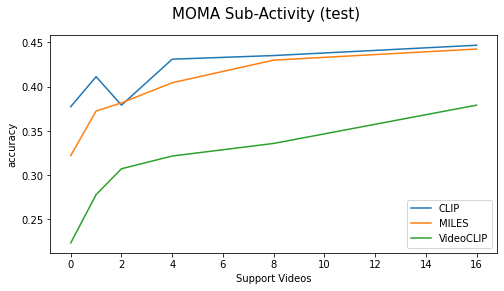

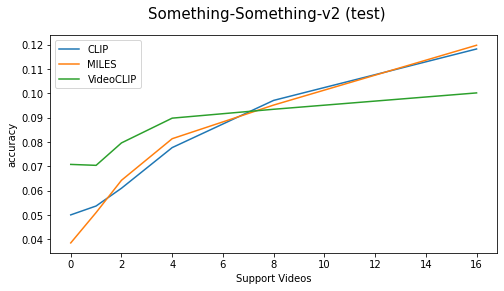

In [3]:
plot(
    pd.read_csv("vl_proto.test.csv"),
    x_col="n_support",
    y_col="accuracy",
    plot_descriptor_cols=["query_dataset"],
    line_descriptor_cols=["vlm_class"]
)

624 Overall Lines
12 Separate Plots


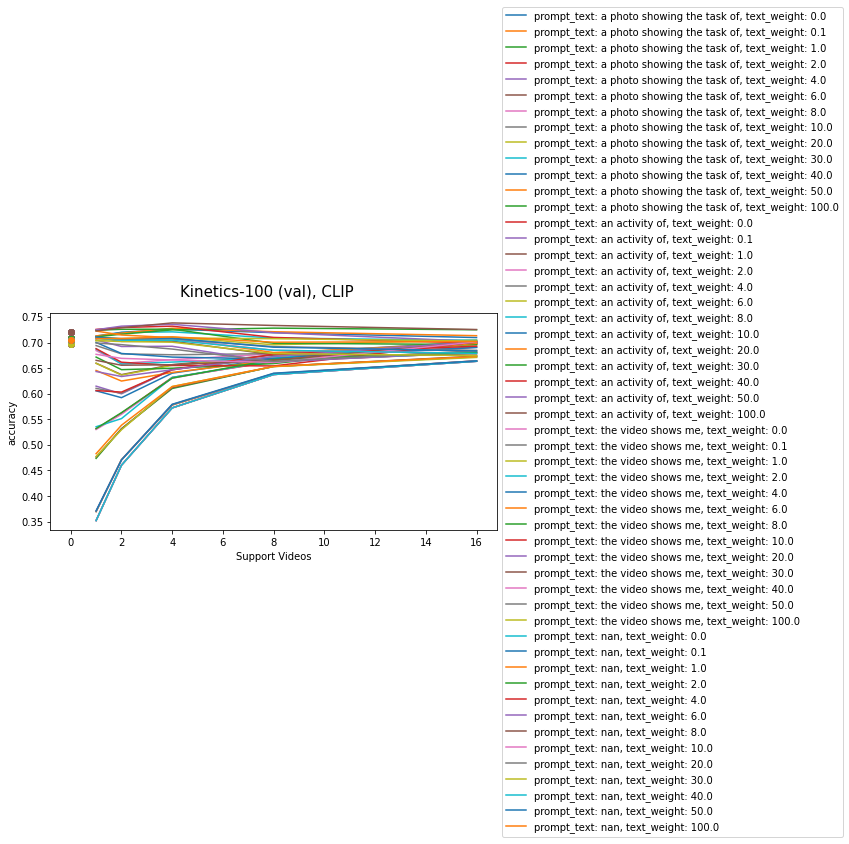

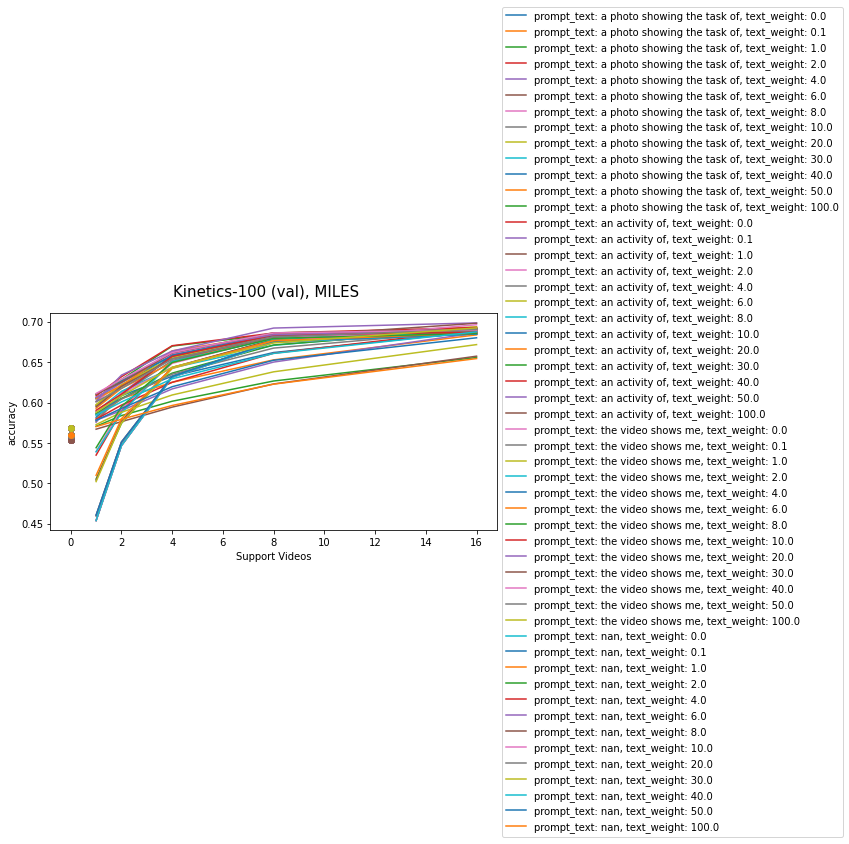

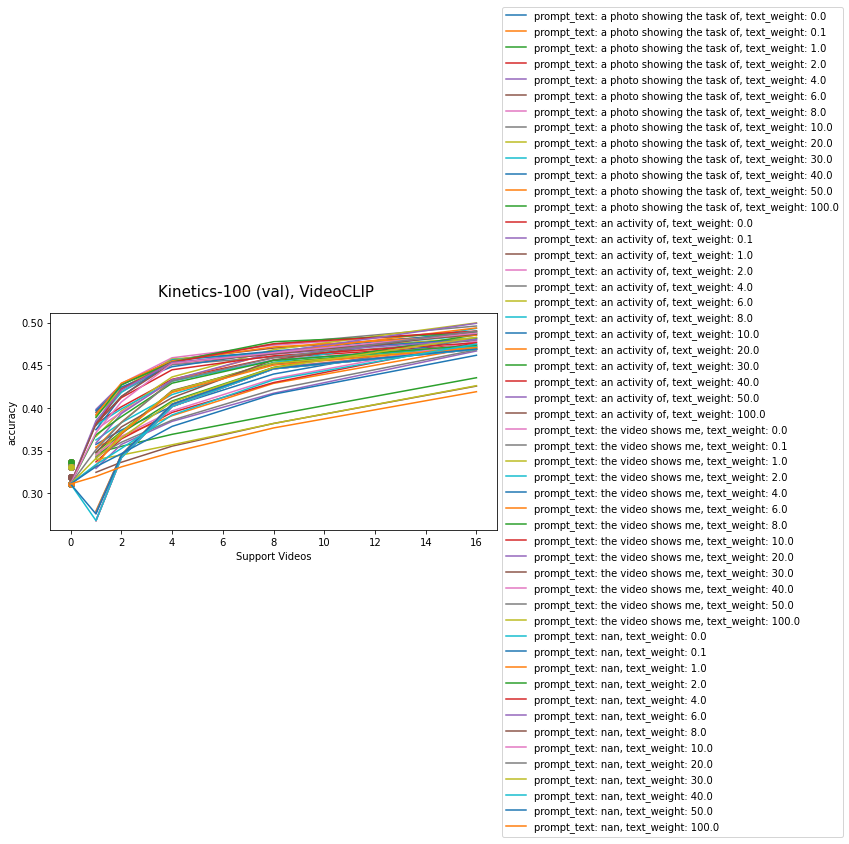

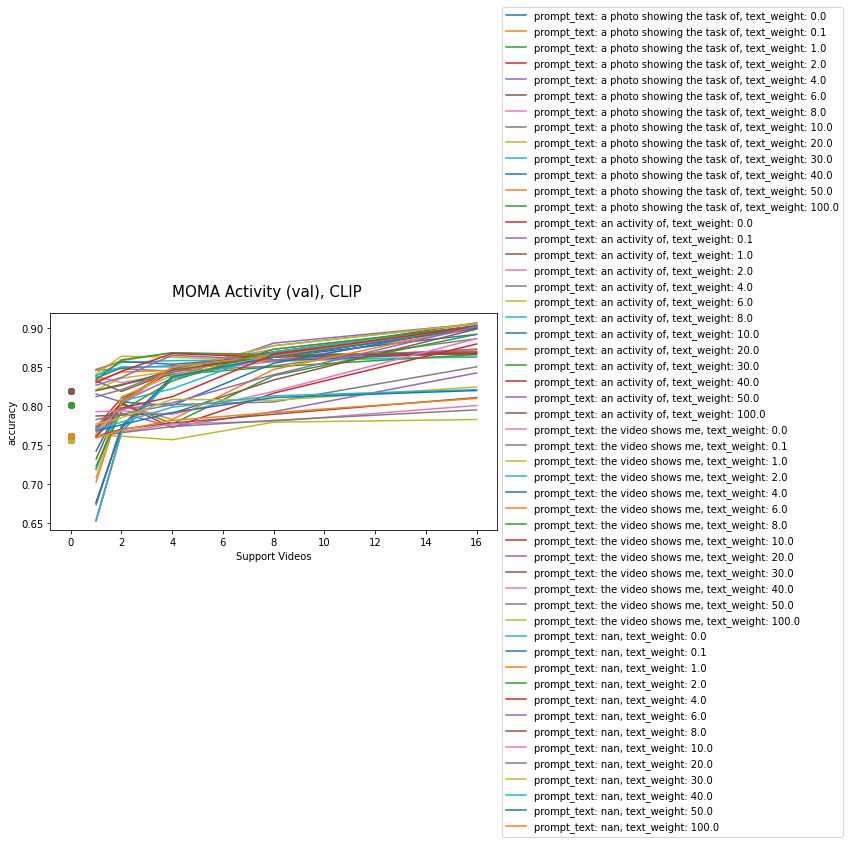

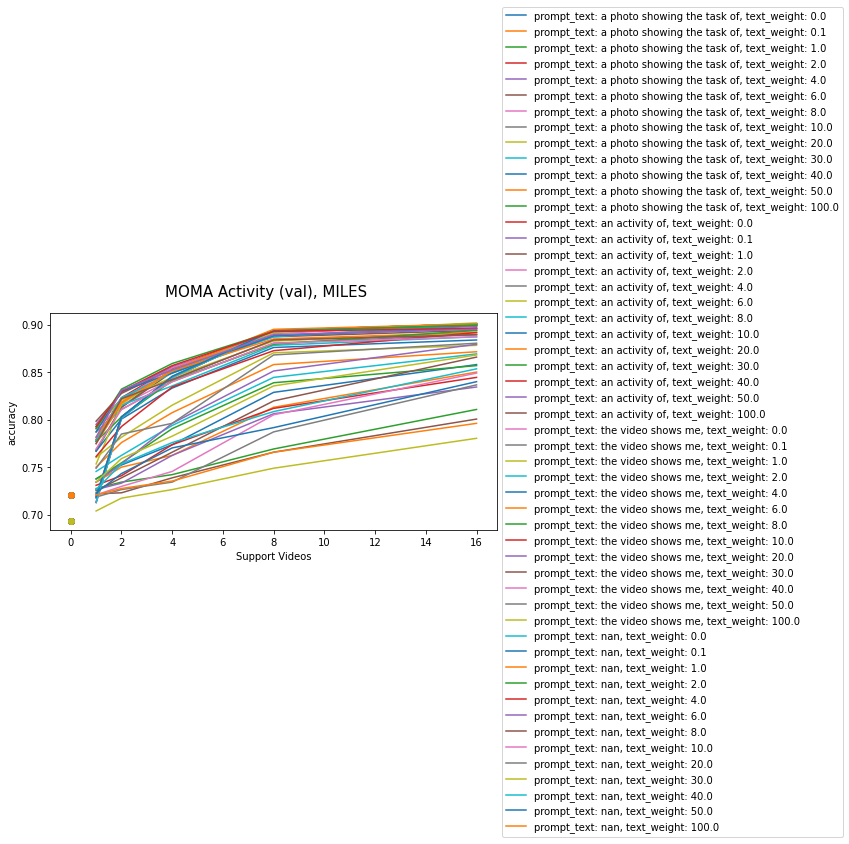

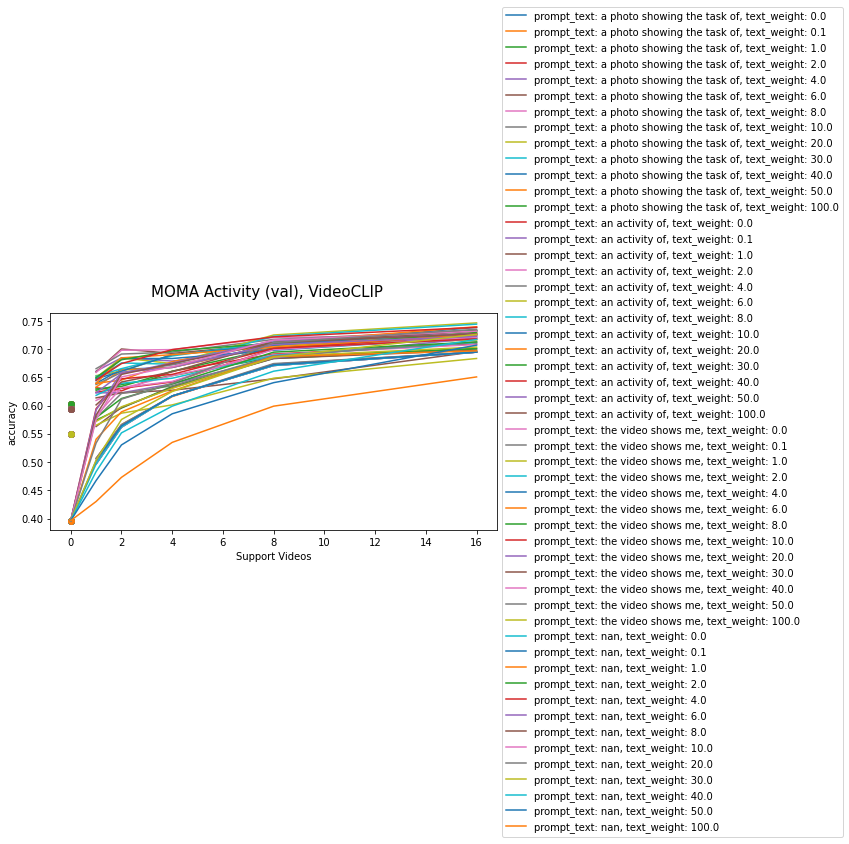

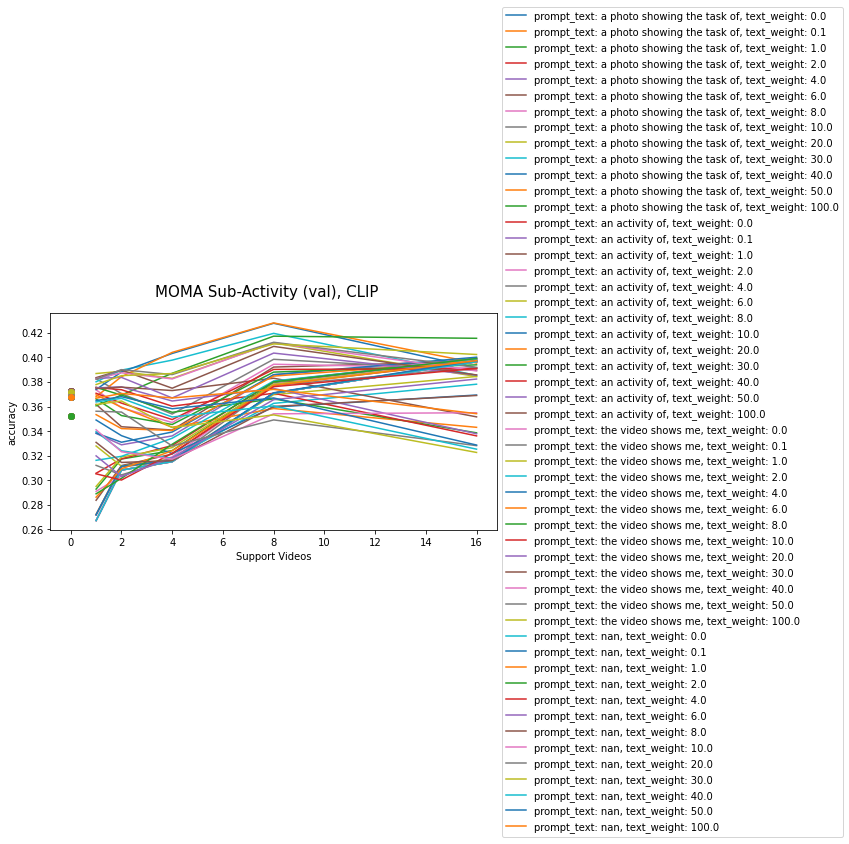

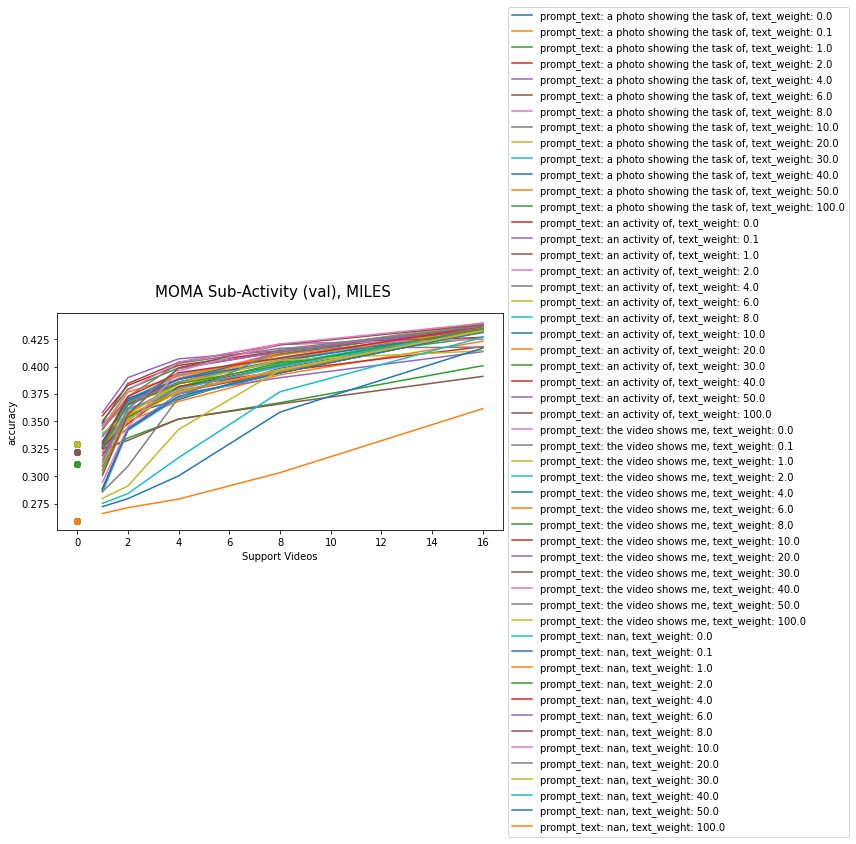

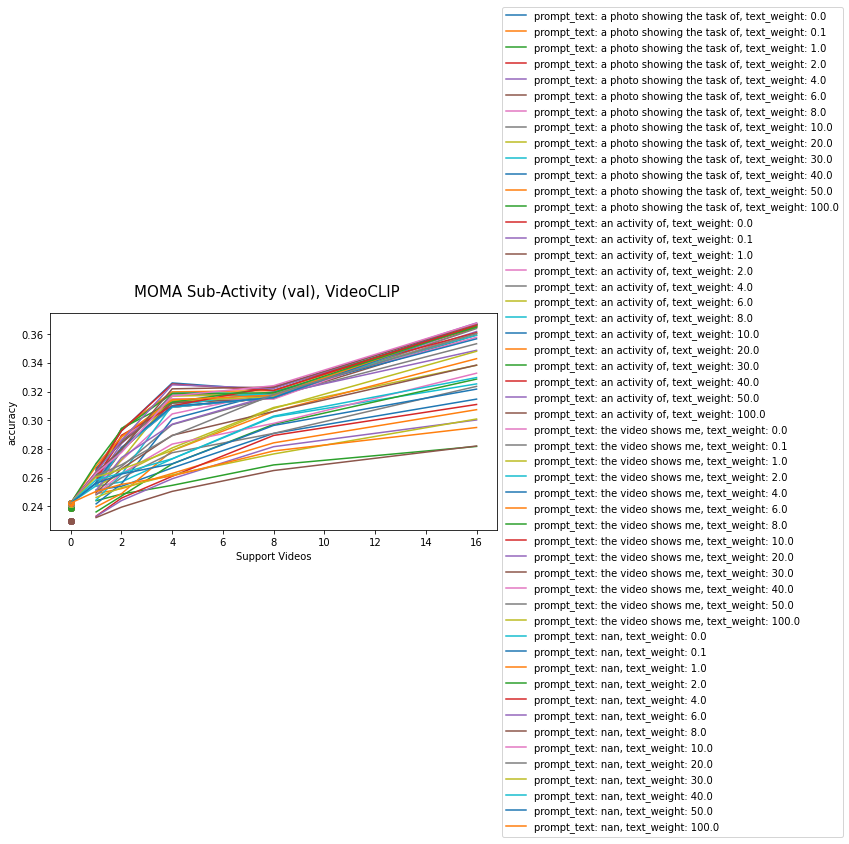

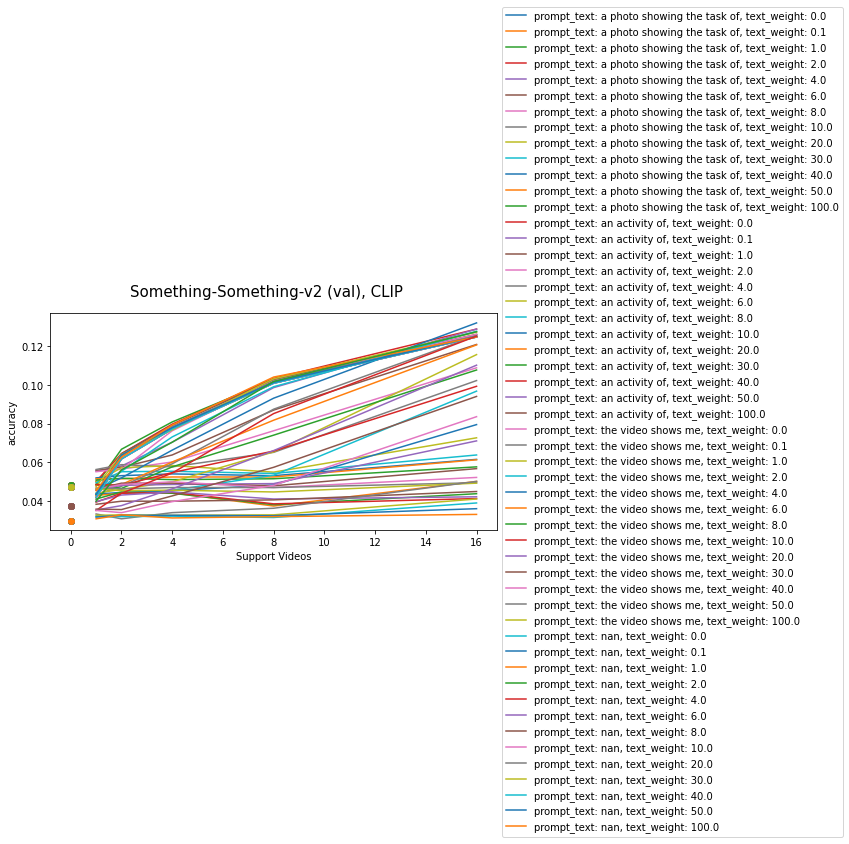

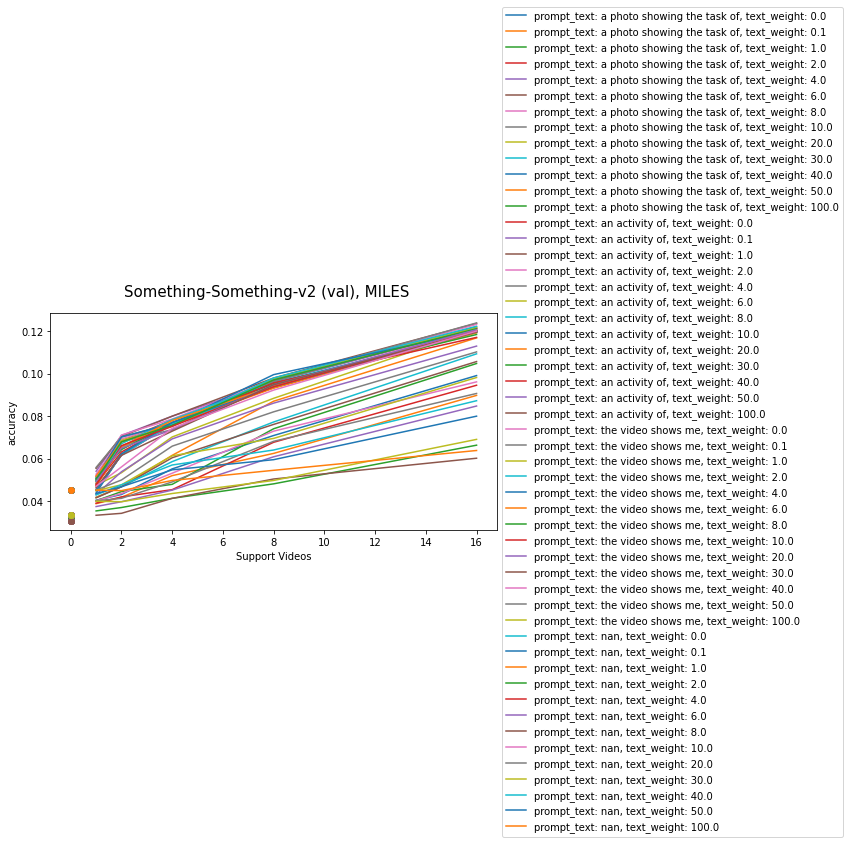

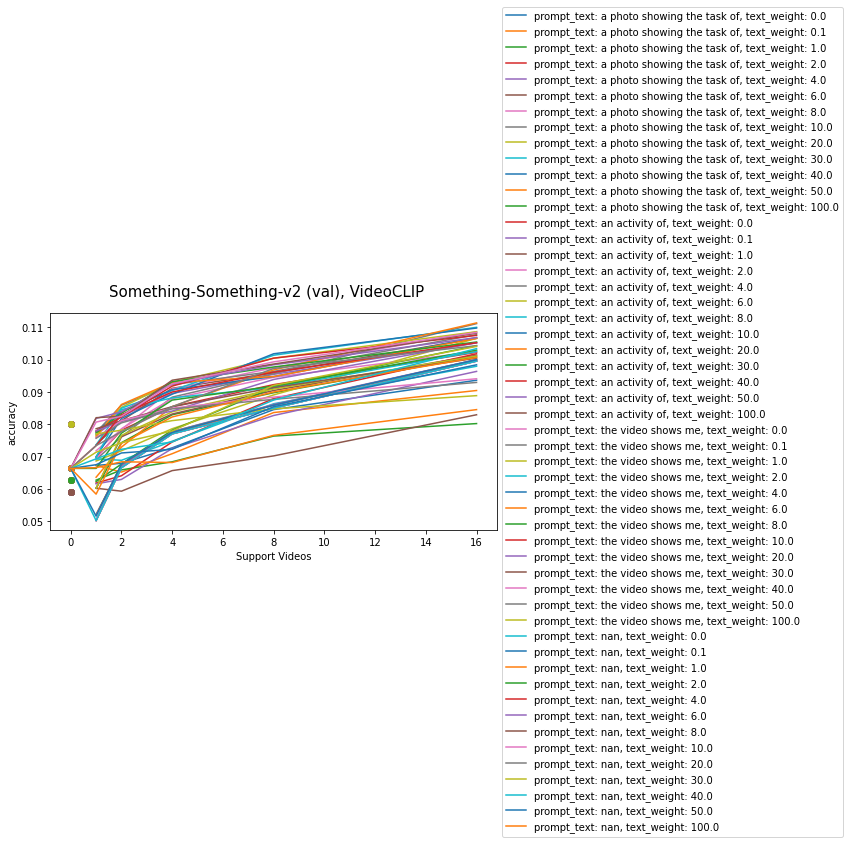

In [7]:
plot(
    pd.read_csv("vl_proto.csv"),
    x_col="n_support",
    y_col="accuracy",
    plot_descriptor_cols=["query_dataset", "vlm_class"],
    line_descriptor_cols=["classifier.prompt_text", "classifier.text_weight"]
)